# Joint distribution

In [11]:
library(data.table)
library(weights)

In [12]:
set.seed(100923)
va = paste0('A', 1:3) 
vb = paste0('B', 1:3)

a = sample(va, 500, replace=TRUE)
b = sample(vb, 500, replace=TRUE)
dat = data.table(a, b)
dat[, total_sim := .N]
nrow(dat)
head(dat)

[1] 500

a,b,total_sim
<chr>,<chr>,<int>
A2,B3,500
A1,B1,500
A3,B1,500
A2,B2,500
A2,B3,500
A2,B1,500


In [13]:
joint = c(10, 23, 4, 23, 56, 10, 32, 23, 34)
la = rep(c('A1', 'A2', 'A3'), 3)
lb = c(rep('B1', 3), rep('B2', 3), rep('B3', 3))

djoint = data.table(a=la,b=lb, joint=joint)
djoint[, total_joint := sum(joint)]
djoint

a,b,joint,total_joint
<chr>,<chr>,<dbl>,<dbl>
A1,B1,10,215
A2,B1,23,215
A3,B1,4,215
A1,B2,23,215
A2,B2,56,215
A3,B2,10,215
A1,B3,32,215
A2,B3,23,215
A3,B3,34,215


In [14]:
print(wpct(dat$b))

   B1    B2    B3 
0.332 0.356 0.312 


In [15]:
dat = merge(dat, djoint, by=c('a', 'b'))
dat[, sim_group := .N, .(a, b)]
dat[, w := joint/total_joint * total_sim/sim_group]
print(head(dat[, .(a, b, w)], 4))

    a  b         w
1: A1 B1 0.5537099
2: A1 B1 0.5537099
3: A1 B1 0.5537099
4: A1 B1 0.5537099


In [16]:
total = sum(djoint$joint)
print(djoint[, .(prop=sum(joint)/total), a])
print(djoint[, .(prop=sum(joint)/total), b])

    a      prop
1: A1 0.3023256
2: A2 0.4744186
3: A3 0.2232558
    b      prop
1: B1 0.1720930
2: B2 0.4139535
3: B3 0.4139535


In [17]:
head(dat)

a,b,total_sim,joint,total_joint,sim_group,w
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>
A1,B1,500,10,215,42,0.5537099
A1,B1,500,10,215,42,0.5537099
A1,B1,500,10,215,42,0.5537099
A1,B1,500,10,215,42,0.5537099
A1,B1,500,10,215,42,0.5537099
A1,B1,500,10,215,42,0.5537099


In [18]:
print(wpct(dat$b))
print(wpct(dat$b, dat$w))

   B1    B2    B3 
0.332 0.356 0.312 
       B1        B2        B3 
0.1720930 0.4139535 0.4139535 


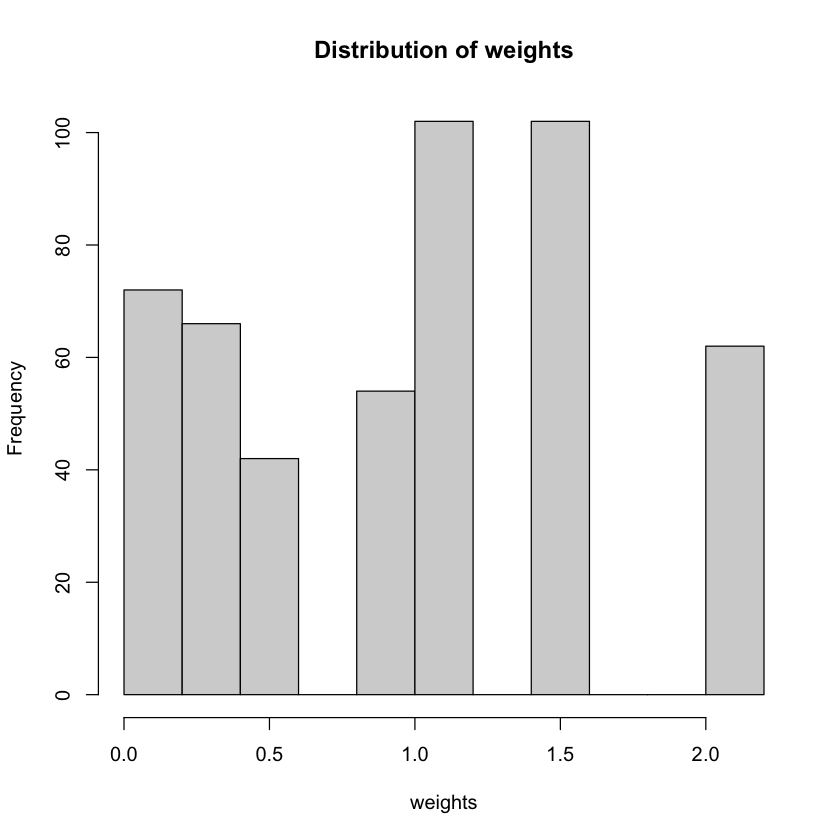

In [19]:
hist(dat$w, breaks=10, main='Distribution of weights', xlab='weights')

In [20]:
sum(dat$w)

[1] 500

In [21]:
# scaling weights 
dat[, w2 := w * 30]
sum(dat$w2)
dat[, w3 := w2 * nrow(dat)/sum(w2)]
sum(dat$w3)

[1] 15000

[1] 500

In [22]:
# weights design effect
((sum(dat$w^2) / (sum(dat$w)) ^ 2) * nrow(dat)) 

[1] 1.384074

In [23]:
# cells with big weights
head(dat[w>2], 3)

a,b,total_sim,joint,total_joint,sim_group,w,w2,w3
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
A2,B2,500,56,215,62,2.100525,63.01575,2.100525
A2,B2,500,56,215,62,2.100525,63.01575,2.100525
A2,B2,500,56,215,62,2.100525,63.01575,2.100525


# Raking 

In [24]:
# removes::install_github("sdaza/autumn-adjustments", force=TRUE)
library(autumn)

In [25]:
target = list(
    a = c(A1 = 0.302, A2 = 0.474, A3 = 0.223), 
    b = c(B1 = 0.172, B2=0.413, B3=0.413)
)
target = normalize(target)

In [26]:
result = harvest(dat, target)
print(diagnose_weights(data=result, target=target, weights=result$weights))

  variable level prop_original prop_weighted    target error_original
1        a    A1         0.282     0.3023023 0.3023023     0.02030230
2        a    A2         0.336     0.4744745 0.4744745     0.13847447
3        a    A3         0.382     0.2232232 0.2232232     0.15877678
4        b    B1         0.332     0.1723447 0.1723447     0.15965531
5        b    B2         0.356     0.4138277 0.4138277     0.05782766
6        b    B3         0.312     0.4138277 0.4138277     0.10182766
  error_weighted
1   1.307898e-12
2   4.956591e-13
3   1.798922e-12
4   2.331468e-15
5   3.830269e-15
6   6.106227e-16


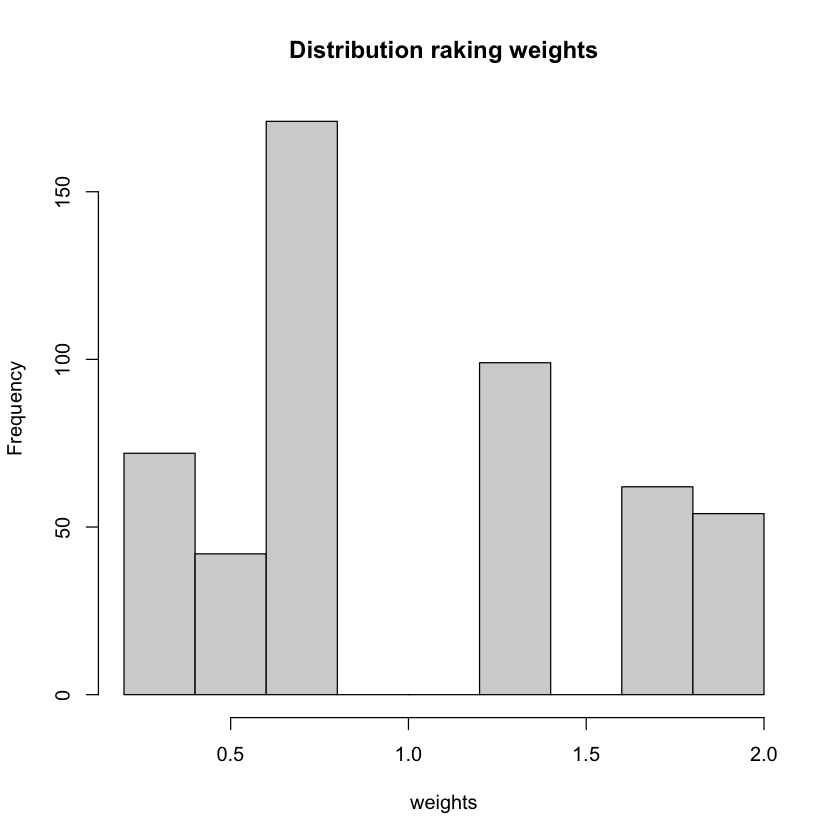

In [27]:
hist(result$weights, main="Distribution raking weights", xlab="weights")

In [28]:
design_effect(result$weights)

[1] 1.240838

In [29]:
effective_sample_size(result$weights)

[1] 402.9536